## data available at http://archive.stsci.edu/
## table of labelled data properties available at http://exoplanetarchive.ipac.caltech.edu/

In [198]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import fits
from scipy.stats import binned_statistic
from scipy.interpolate import splrep, splev, UnivariateSpline, BSpline, InterpolatedUnivariateSpline

In [199]:
data = pd.read_csv('../KOI.csv')

# Data headings

In [200]:
print('data columns:')
data.columns

data columns:


Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [201]:
data.head(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [202]:
data = data.drop(['ra','dec'],axis=1)

# Distributions of data properties...

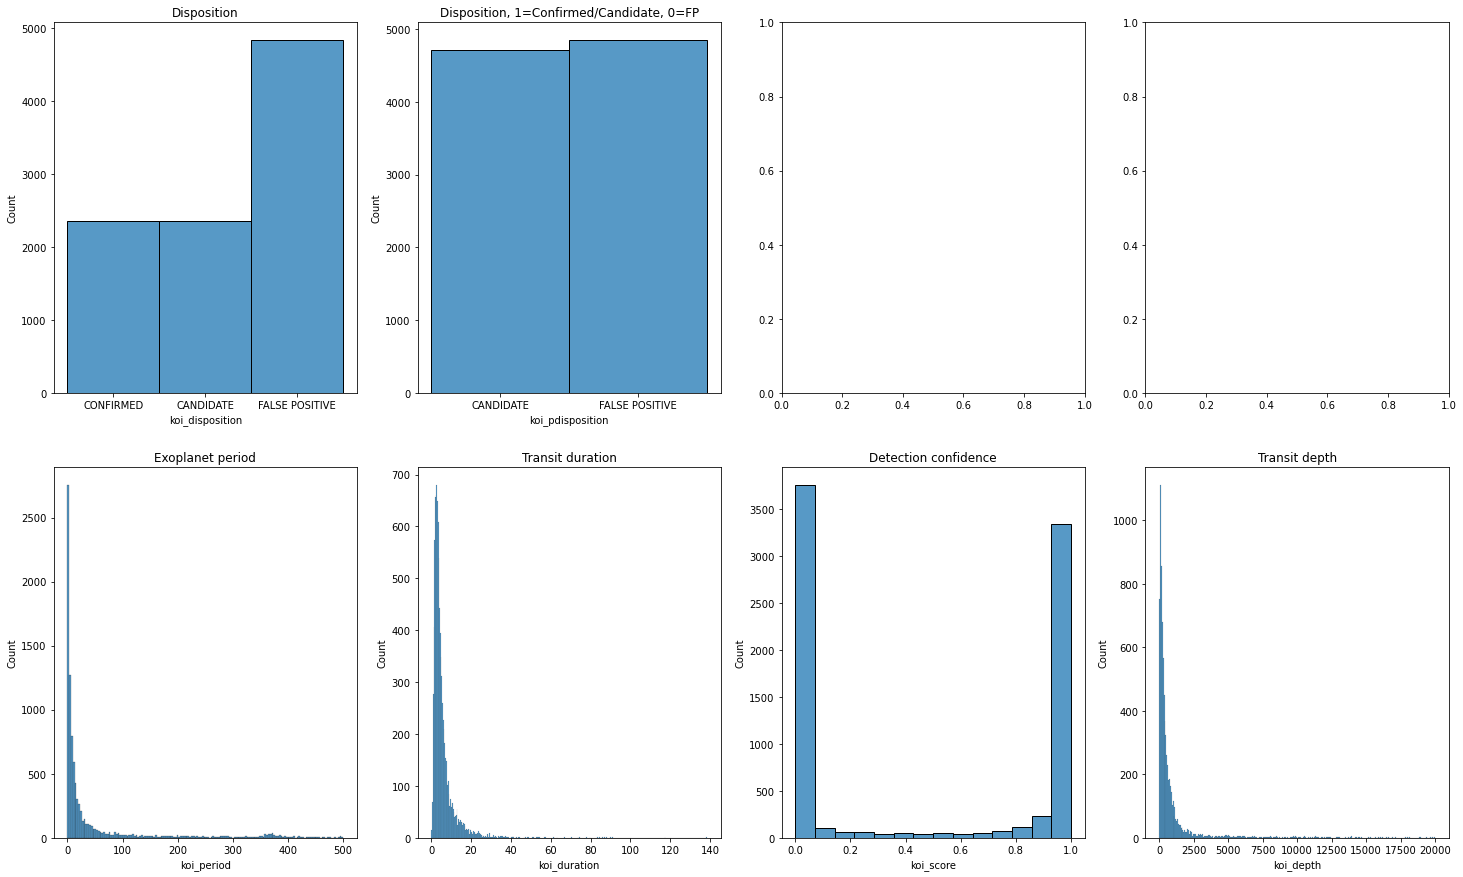

In [203]:
fig, axs = plt.subplots(2,4)
fig.set_figwidth(25)
fig.set_figheight(15)

sns.histplot(data=data.koi_disposition, ax=axs[0,0])
axs[0,0].title.set_text('Disposition')

sns.histplot(data=data.koi_pdisposition, ax=axs[0,1])
axs[0,1].title.set_text('Disposition, 1=Confirmed/Candidate, 0=FP')

# plot all but the highest as this is very large
sns.histplot(data=data.koi_period[data.koi_period<500], ax=axs[1,0])
axs[1,0].title.set_text('Exoplanet period')

sns.histplot(data=data.koi_duration, ax=axs[1,1])
axs[1,1].title.set_text('Transit duration')

sns.histplot(data=data.koi_score, ax=axs[1,2])
axs[1,2].title.set_text('Detection confidence')

sns.histplot(data=data.koi_depth[data.koi_depth<0.02e6], ax=axs[1,3])
axs[1,3].title.set_text('Transit depth')


# Some systems are 'candidates' for positive detections, with a spread of koi_scores...

Text(0.5, 1.0, 'Confidence of all "CANDIDATE" systems')

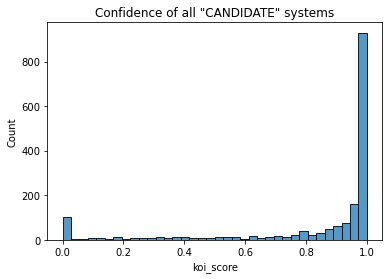

In [204]:
sns.histplot(data.koi_score[(data.koi_disposition=='CANDIDATE') & (data.koi_pdisposition=='CANDIDATE')])
plt.title('Confidence of all "CANDIDATE" systems')

# Now look at the raw transit data...

### kepid 6022556 is a high score system with 1 confirmed transiting planet.

In [205]:
sysid = 6022556
obsq1 = fits.open('../6022556/kplr006022556-2009166043257_llc.fits')
obsq1[1].data

FITS_rec([(131.5129356 , 0.00194178, 1105, 5978.79  , 3.0453346, 472.07498, 0.21199664, 8591.977, 4.4145975, 0, nan, nan, nan, nan, 834.30741223, 0.00069595, 928.18585874, 0.00070769,  0.01556019,  0.06613324),
          (131.53337009, 0.00194257, 1106, 5975.9224, 3.0460227, 472.0584 , 0.21168566, 8587.602, 4.4145446, 0, nan, nan, nan, nan, 834.30842788, 0.00069591, 928.18582389, 0.00070764,  0.0154387 ,  0.06597693),
          (131.55380449, 0.00194337, 1107, 5981.4287, 3.0467153, 472.4473 , 0.21208474, 8595.934, 4.4167666, 0, nan, nan, nan, nan, 834.30836736, 0.00069538, 928.18598199, 0.000707  ,  0.01550088,  0.06575003),
          ...,
          (164.94336159, 0.00300377, 2741, 5827.572 , 3.0238037, 442.87503, 0.21117665, 8591.504, 4.380768 , 0, nan, nan, nan, nan, 834.29196646, 0.00069879, 928.10677943, 0.00072209, -0.01650147, -0.08044873),
          (164.96379557, 0.00300425, 2742, 5815.219 , 3.0227304, 443.07043, 0.21156725, 8576.702, 4.3807034, 0, nan, nan, nan, nan, 834.29145

### load more data from previous quarters (Q0,Q1,Q2 and Q3) and plot...

In [206]:
# load more data
obsq2 = fits.open('../6022556/kplr006022556-2009259160929_llc.fits')
obsq3 = fits.open('../6022556/kplr006022556-2009350155506_llc.fits')
obsq4 = fits.open('../6022556/kplr006022556-2010078095331_llc.fits')

       kepid   kepler_name koi_disposition  koi_score  koi_period  \
158  6022556  Kepler-697 b       CONFIRMED        1.0    3.709871   

     koi_duration  
158        3.0694  


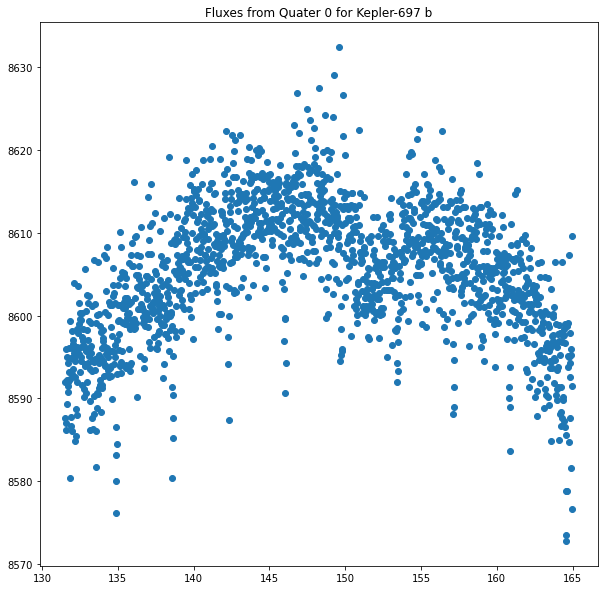

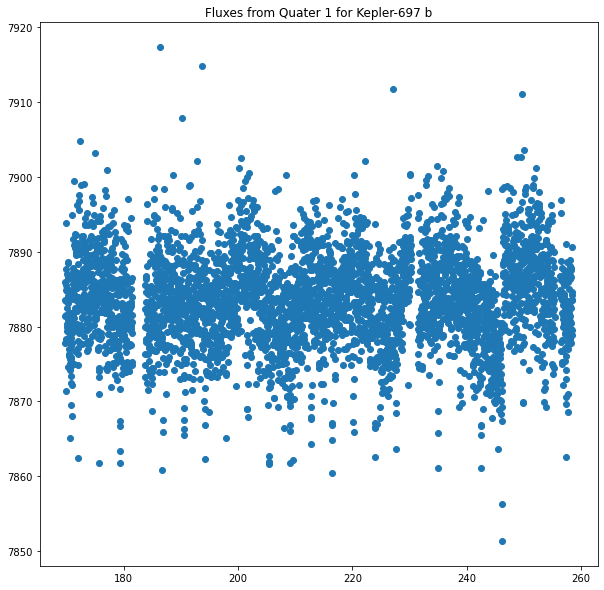

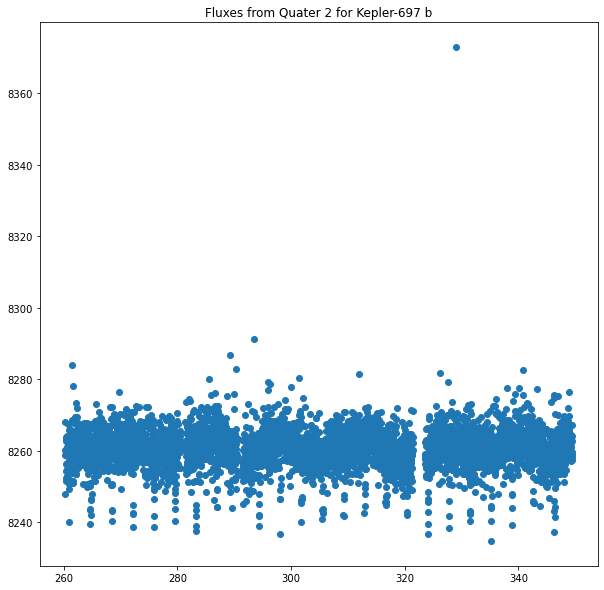

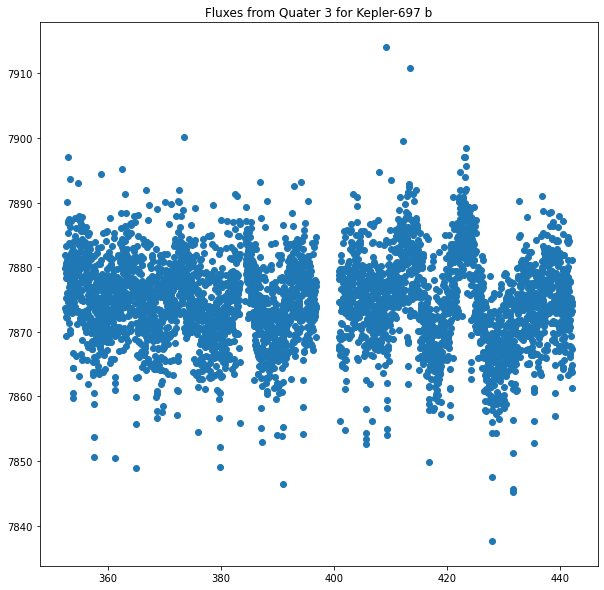

In [207]:
print(data[data.kepid==sysid][['kepid','kepler_name','koi_disposition','koi_score','koi_period','koi_duration']])

plt.figure(figsize=[10,10])
plt.scatter(obsq1[1].data.TIME,obsq1[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 0 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq2[1].data.TIME,obsq2[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 1 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq3[1].data.TIME,obsq3[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 2 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq4[1].data.TIME,obsq4[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 3 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

## Try folding data back on itself to get more resolved transits...

In [210]:
print(data[data.kepid==sysid][['kepid','kepler_name','koi_disposition','koi_score','koi_period','koi_duration']])

       kepid   kepler_name koi_disposition  koi_score  koi_period  \
158  6022556  Kepler-697 b       CONFIRMED        1.0    3.709871   

     koi_duration  
158        3.0694  


## fold the data back on itself, given the planet's orbital period, to give a more resolved transit...

In [211]:
obsq3 = fits.open('../6022556/kplr006022556-2009350155506_llc.fits')

In [212]:
def fold_data(obs,sysid,df):
    """
    fold the data back on itself given the planet's orbital period.
    """
    times = obs[1].data.TIME
    flux = obs[1].data.PDCSAP_FLUX
    period = df[df.kepid==sysid]['koi_period'].iloc[0]
    
    times -= times[0]
    times = np.mod(times,period)
    
    plt.scatter(times,flux,s=0.5)
    plt.ylim([8230,8290])

    return times, flux

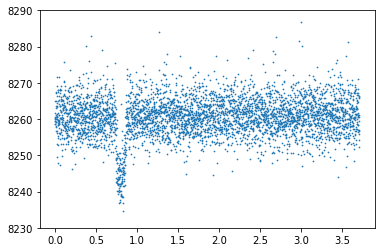

In [213]:
times, flux = fold_data(obsq3,6022556,data)

times = times[~np.isnan(flux)]
flux = flux[~np.isnan(flux)]

## bin this folded data, calculate median flux in each bin

In [214]:
binned = binned_statistic(times, flux, 'mean', bins=1000)

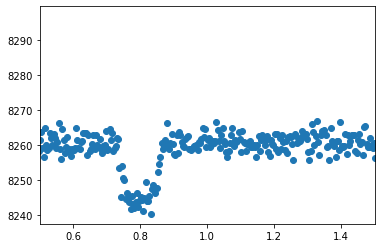

In [215]:
plt.scatter(binned[1][:-1],binned[0])
plt.xlim([0.5,1.5])
plt.show()

### System 7935997 is a 'confirmed' system with a koi_score of 0 (i.e. low confidence detection)...or is it a false positive? Not sure...

In [216]:
sysid=7935997
obsq1 = fits.open('../7935997/kplr007935997-2009131105131_llc.fits')
obsq2 = fits.open('../7935997/kplr007935997-2009166043257_llc.fits')
obsq3 = fits.open('../7935997/kplr007935997-2009259160929_llc.fits')
obsq4 = fits.open('../7935997/kplr007935997-2009350155506_llc.fits')

In [217]:
print(data[data.kepid==sysid][['kepid','kepler_name','koi_disposition','koi_score','koi_period','koi_duration']])

        kepid    kepler_name koi_disposition  koi_score  koi_period  \
6743  7935997            NaN  FALSE POSITIVE        NaN  322.556630   
9083  7935997  Kepler-1629 b       CONFIRMED        0.0    3.875943   

      koi_duration  
6743         3.740  
9083         2.314  


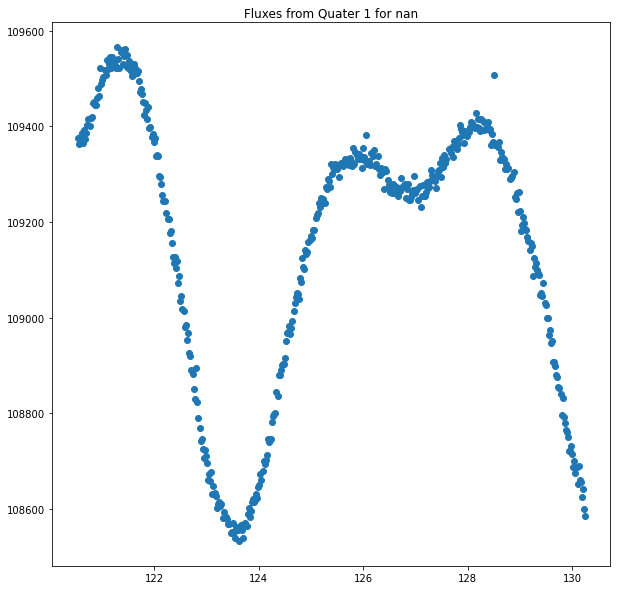

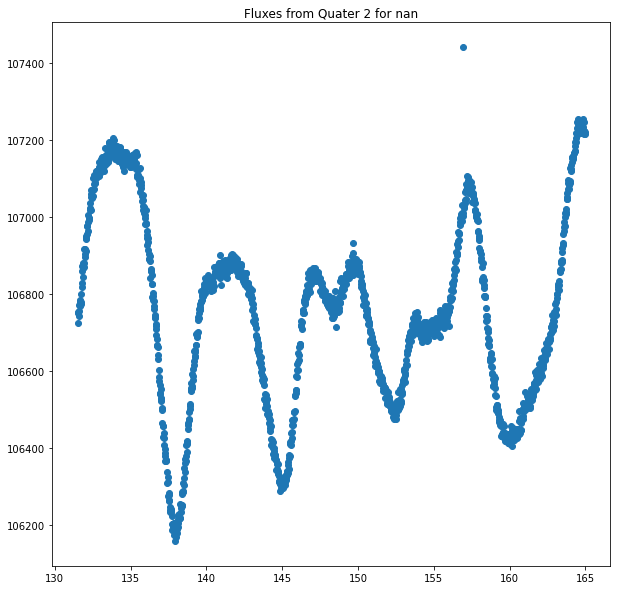

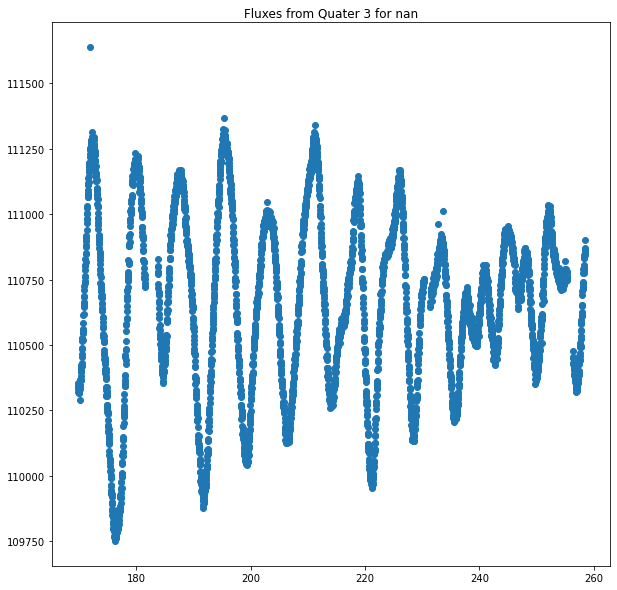

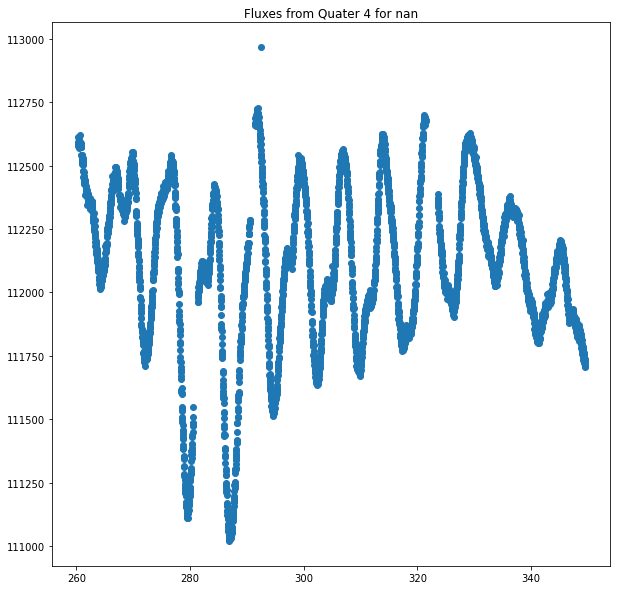

In [218]:
plt.figure(figsize=[10,10])
plt.scatter(obsq1[1].data.TIME,obsq1[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 1 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq2[1].data.TIME,obsq2[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 2 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq3[1].data.TIME,obsq3[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 3 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

plt.figure(figsize=[10,10])
plt.scatter(obsq4[1].data.TIME,obsq4[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 4 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

# Some of the systems have multiple detected planets...

938 systems have more than 1 planets
277 systems have more than 2 planets
98 systems have more than 3 planets
30 systems have more than 4 planets
5 systems have more than 5 planets


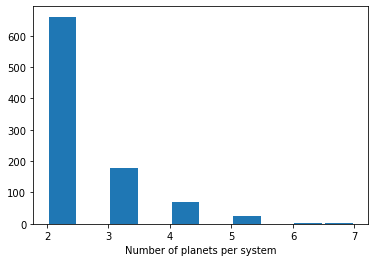

In [219]:
nplanets = data.groupby(data.kepid).count()

print('%i systems have more than 1 planets' %(nplanets.kepoi_name>1).sum())
print('%i systems have more than 2 planets' %(nplanets.kepoi_name>2).sum())
print('%i systems have more than 3 planets' %(nplanets.kepoi_name>3).sum())
print('%i systems have more than 4 planets' %(nplanets.kepoi_name>4).sum())
print('%i systems have more than 5 planets' %(nplanets.kepoi_name>5).sum())

plt.hist(nplanets.kepoi_name[nplanets.kepoi_name>1],rwidth=0.9)
plt.xlabel('Number of planets per system')
plt.show()

### kepid 1432789 has 2 confirmed planets...lets see what this transit data looks like...

In [220]:
data[data.kepid == 1432789]

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
438,1432789,K00992.01,Kepler-745 b,CONFIRMED,CANDIDATE,0.848,0,0,0,0,...,5782.0,78.0,-78.0,4.28,0.137,-0.112,1.22,0.196,-0.176,15.214
7570,1432789,K00992.02,NaN,CANDIDATE,CANDIDATE,0.961,0,0,0,0,...,5782.0,78.0,-78.0,4.28,0.137,-0.112,1.22,0.196,-0.176,15.214


## quite hard to tell where the transit is in this system actually...

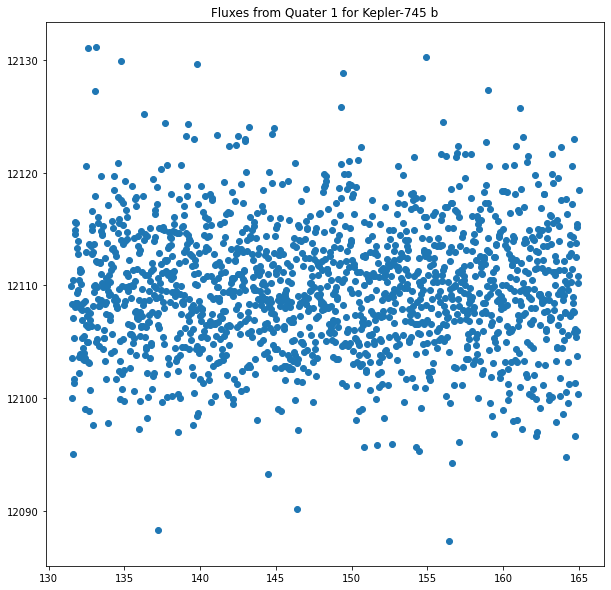

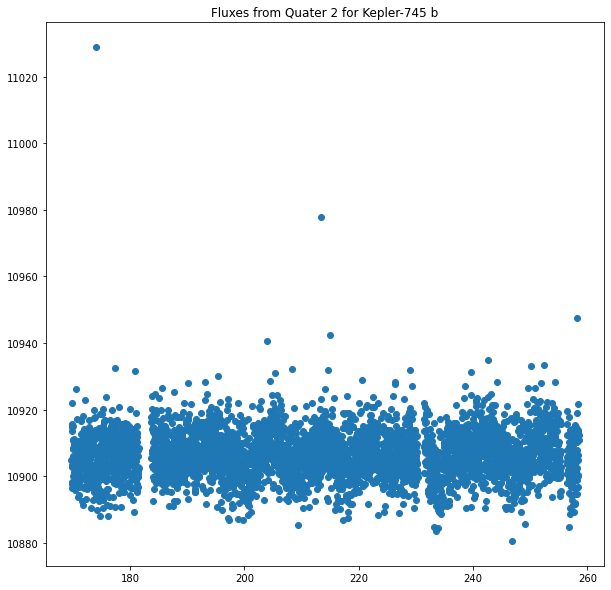

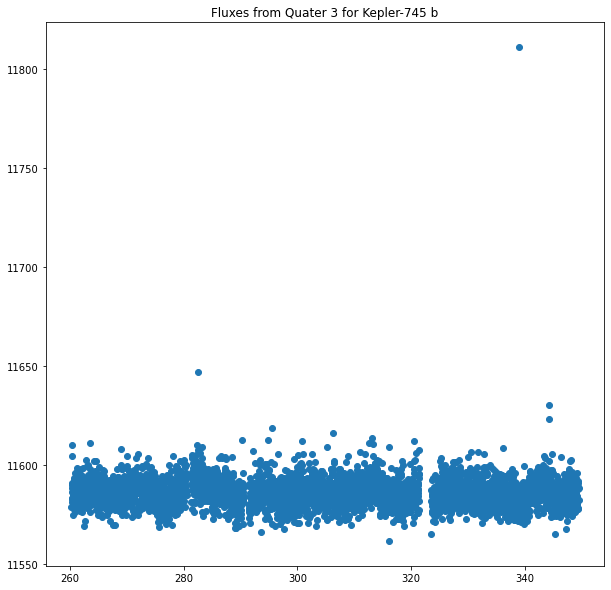

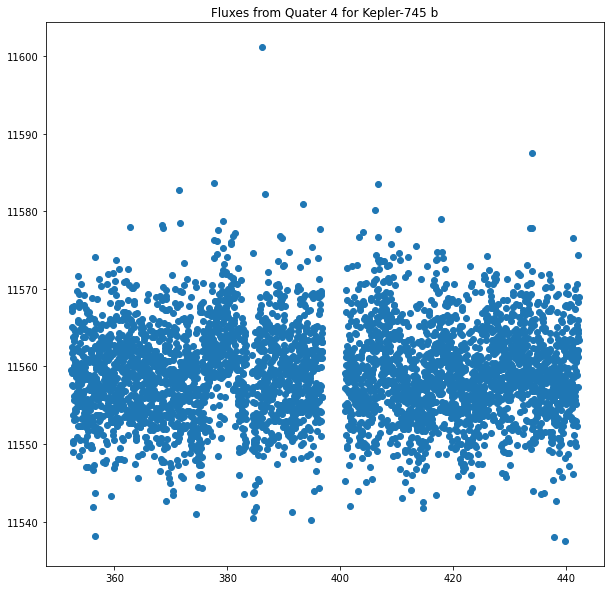

In [221]:
sysid = 1432789
obs = fits.open('../1432789/kplr001432789-2009166043257_llc.fits')

plt.figure(figsize=[10,10])
plt.scatter(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 1 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

obs = fits.open('../1432789/kplr001432789-2009259160929_llc.fits')

plt.figure(figsize=[10,10])
plt.scatter(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 2 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

obs = fits.open('../1432789/kplr001432789-2009350155506_llc.fits')

plt.figure(figsize=[10,10])
plt.scatter(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 3 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

obs = fits.open('../1432789/kplr001432789-2010078095331_llc.fits')

plt.figure(figsize=[10,10])
plt.scatter(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 4 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

# Now attempt to remove stellar variability from Kepler 1433962 data...

# Try fitting spline to data to remove stellar variability (not finished this yet)

In [223]:
sysid = 7935997
obs = fits.open('../7935997/kplr007935997-2009131105131_llc.fits')

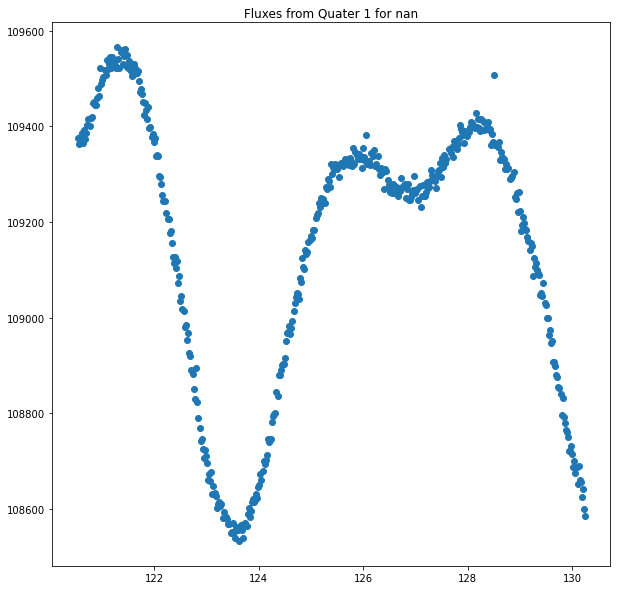

In [224]:
plt.figure(figsize=[10,10])
plt.scatter(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
plt.title('Fluxes from Quater 1 for %s' %data.kepler_name[data.kepid==sysid].iloc[0])
plt.show()

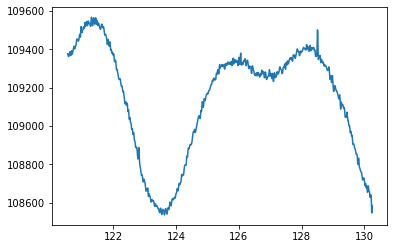

In [225]:
def fit_spline(time,flux):
    # make sure data x vals are in increasing numbers
    order = np.argsort(time)
    flux = flux[order]
    time = time[order]
    
    # ensure no nans before fitting
    mask = ~np.isnan(flux) & ~np.isnan(time)
    flux = flux[mask]
    time = time[mask]

    # fit spline
    tck = UnivariateSpline(time,flux)
    return tck

obs = fits.open('../7935997/kplr007935997-2009131105131_llc.fits')
tck = fit_spline(obs[1].data.TIME,obs[1].data.PDCSAP_FLUX)
x = np.linspace(time[0],time[-1],1000)
y = tck(x)
plt.plot(x,y)

spline-fit converged after 0 iterations.


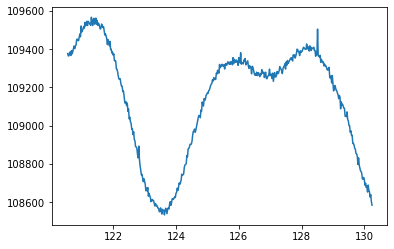

In [226]:
def remove_stellar_activity(obs):
    
    time = obs[1].data.TIME
    flux = obs[1].data.PDCSAP_FLUX
    fluxerr = obs[1].data.PDCSAP_FLUX_ERR
    
    
    # make sure data x vals are in increasing numbers
    order = np.argsort(time)
    flux = flux[order]
    time = time[order]
    fluxerr = fluxerr[order]
    
    # ensure no nans before fitting
    mask = ~np.isnan(flux) & ~np.isnan(time)
    flux = flux[mask]
    fluxerr = fluxerr[mask]
    time = time[mask]
    
    tck = fit_spline(time,flux)
    mask = np.ones(len(time),dtype=bool)
    converged = False
    n = 0
    while not converged:
        time = time[mask]
        flux = flux[mask]
        fluxerr = fluxerr[mask]
        tck = fit_spline(time,flux)
        y = tck(time)
        mask = (flux+3*fluxerr > y) | (flux-3*fluxerr < y)
        if mask.sum()==len(mask):
            converged=True
            print('spline-fit converged after %i iterations.' %n)
        else:
            n+=1

    plt.plot(time,y)

remove_stellar_activity(obs)